<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* pandas functions 
* dt
* regression

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from datetime import datetime, date, time, timedelta, timezone

# pandas functions

In [2]:
list_file = [f'players_{a:02d}.csv' for a in range(15, 18)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [3]:
d1.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

In [6]:
top_nans = pd.DataFrame(d1.isnull().sum()[d1.isnull().sum() != 0], columns = ['nans']).nlargest(3, 'nans')
top_nans

,nans
release_clause_eur,49375
loaned_from,46230
nation_position,46198


In [9]:
d1[top_nans.index].fillna(d1.mode().iloc[0,0]).head()

,release_clause_eur,loaned_from,nation_position
0,28.0,28.0,CF
1,28.0,28.0,LW
2,28.0,28.0,RS
3,28.0,28.0,ST
4,28.0,28.0,GK


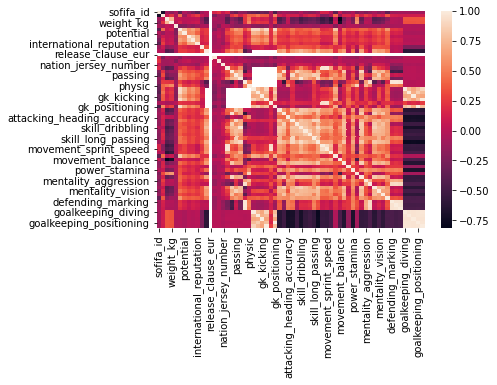

In [11]:
sns.heatmap(d1.corr())

In [16]:
d2 = pd.read_csv('pivot.csv', parse_dates = ['month'], dtype = {'state':'category'})
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   20 non-null     datetime64[ns]
 1   state   20 non-null     category      
 2   permit  19 non-null     float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 508.0 bytes


In [17]:
d2.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [18]:
d2.isnull().sum()

month     0
state     0
permit    1
dtype: int64

In [23]:
d2.permit = d2.permit.fillna(d2.permit.mean()).astype('int32')
d2.isnull().sum()

month     0
state     0
permit    0
dtype: int64

In [35]:
s1 = pd.pivot_table(d2, index = 'state', columns = 'month', values = 'permit')
s1

month,2020-01-31,2020-02-29,2020-03-31,2020-04-30
state,,,,
Alabama,37140,29633,31205,21276
Alaska,223,139,143,85
California,34694,32002,27792,24460
Massachusetts,9289,9173,13892,5074
North Dakota,370,396,587,280


In [36]:
s1.columns = s1.columns.astype('str')
s1 = s1.reset_index()
s1

month,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140,29633,31205,21276
1,Alaska,223,139,143,85
2,California,34694,32002,27792,24460
3,Massachusetts,9289,9173,13892,5074
4,North Dakota,370,396,587,280


In [37]:
s1.columns.name = None
s1

,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140,29633,31205,21276
1,Alaska,223,139,143,85
2,California,34694,32002,27792,24460
3,Massachusetts,9289,9173,13892,5074
4,North Dakota,370,396,587,280


In [42]:
s2 = pd.melt(s1, id_vars = 'state', var_name = 'month', value_name = 'permit')
s2.head()

,state,month,permit
0,Alabama,2020-01-31,37140
1,Alaska,2020-01-31,223
2,California,2020-01-31,34694
3,Massachusetts,2020-01-31,9289
4,North Dakota,2020-01-31,370


In [45]:
s2 = s2[d2.columns]
s2.month = s2.month.to_numpy().astype('datetime64[D]')
s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   20 non-null     datetime64[ns]
 1   state   20 non-null     category      
 2   permit  20 non-null     int32         
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 428.0 bytes


# dt

In [47]:
d3  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d3.purchase_date = pd.to_datetime(d3.purchase_date)
d3

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [52]:
d3.assign(month1 = d3.purchase_date.to_numpy().astype('datetime64[D]'),
          month2 = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin(),
          month3 = d3.purchase_date.dt.to_period('M').dt.to_timestamp(),
          month4 = lambda x : x.purchase_date.dt.strftime('%Y-01-01')
          )

,user_id,purchase_date,month1,month2,month3,month4
0,1,2015-01-23 14:05:21,2015-01-23,2015-01-01,2015-01-01,2015-01-01
1,2,2015-02-05 05:07:30,2015-02-05,2015-02-01,2015-02-01,2015-01-01
2,3,2015-02-18 17:08:51,2015-02-18,2015-02-01,2015-02-01,2015-01-01
3,4,2015-03-21 17:07:30,2015-03-21,2015-03-01,2015-03-01,2015-01-01
4,5,2015-03-11 18:32:56,2015-03-11,2015-03-01,2015-03-01,2015-01-01
5,6,2015-03-03 11:02:30,2015-03-03,2015-03-01,2015-03-01,2015-01-01


In [62]:
test = pd.DataFrame({'user_id' : list(range(10000)), 
                     'purchase_date' : pd.date_range('2015-01-01', periods = 10000,
                                                      freq = 'H')
                     })

t1 = "test.assign(month = test.purchase_date.to_numpy().astype('datetime64[D]'))"
t2 = "test.assign(month = test.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())"
t3 = "test.assign(month = test.purchase_date.dt.to_period('M').dt.to_timestamp())"
t4 = "test.assign(month = lambda x : x.purchase_date.dt.strftime('%Y-01-01'))"

txts = [t1, t2, t3, t4]

res = []
for txt in txts : 
  print(txt + 'starts')

  temp = []
  for a in range(1000) : 
    s_time = datetime.now()
    eval(txt)
    e_time = datetime.now()
    temp.append(e_time - s_time)
  
  res.append(np.mean(temp))

wow = pd.DataFrame({'type' : ['np', 'floor-offset', 'period-ts', 'strf'], 'time' : res} )
wow




test.assign(month = test.purchase_date.to_numpy().astype('datetime64[D]'))starts
test.assign(month = test.purchase_date.dt.floor('D') - pd.offsets.MonthBegin())starts
test.assign(month = test.purchase_date.dt.to_period('M').dt.to_timestamp())starts
test.assign(month = lambda x : x.purchase_date.dt.strftime('%Y-01-01'))starts


,type,time
0,np,0 days 00:00:00.001667
1,floor-offset,0 days 00:00:00.002809
2,period-ts,0 days 00:00:00.003458
3,strf,0 days 00:00:00.048576


In [63]:
import plotnine as gg 
from plotnine import aes, ggplot

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/scales/scale.py:611: PlotnineWarning: You have changed the transform of a specialised scale. The result may not be what you expect.
Original transform: pd_timedelta
New transform: pd_timedel
  PlotnineWarning


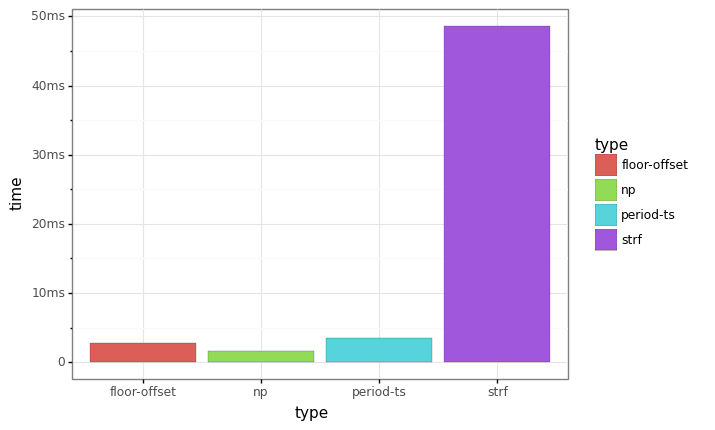

<ggplot: (8772597742205)>

In [64]:
(
    ggplot(wow, aes('type', 'time', fill = 'type')) +
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.theme_bw()
)

In [75]:
x = np.random.randint(1, 11, 10)
x = np.sort(x)
x, np.argmin(x), np.argmax(x), np.min(x), np.max(x)

(array([ 3,  4,  6,  7,  7,  7,  8, 10, 10, 10]), 0, 7, 3, 10)

In [82]:
x = np.random.randint(1,101, 200)
cond = [x >= 90, x >= 50, x >= 0]
labs = list('ABC')
pd.DataFrame({'score' : x, 'grade' : np.select(cond, labs)}).groupby('grade')['score'].agg(['mean', 'std']).reset_index()

,grade,mean,std
0,A,95.193548,3.070498
1,B,69.800000,11.169456
2,C,23.787234,14.471234


# regression

In [84]:
a1 = pd.read_csv('heights.csv')
a2 = pd.read_csv('manhattan.csv')

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [86]:
a1.head()

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


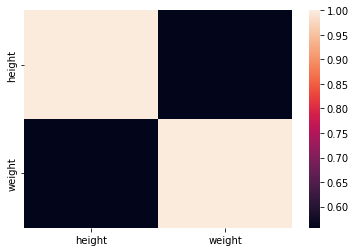

In [94]:
sns.heatmap(a1.corr())

In [87]:
x = a1.height.values.reshape(-1, 1)
y = a1.weight

In [88]:
fit_lm = LinearRegression().fit(x, y)

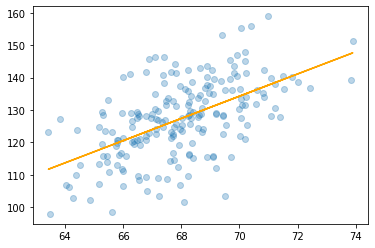

In [90]:
plt.plot(x, y, 'o', alpha = .3)
plt.plot(x, fit_lm.predict(x), color = 'orange')

In [92]:
fit_lm.score(x, y)

0.31009833265482645

In [95]:
a2.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [96]:
a2.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [97]:
x = a2[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee']]
y = a2['rent']

In [100]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [102]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_lm.score(x_tr, y_tr), fit_lm.score(x_te, y_te)

(0.7696660475493309, 0.7990495012905238)

In [104]:
pred = fit_lm.predict(x_te)

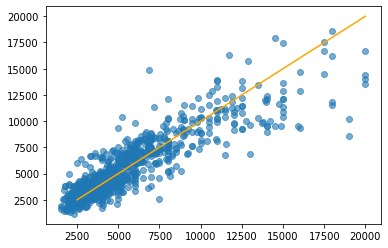

In [106]:
plt.plot(y_te, pred, 'o', alpha = .6)
plt.plot([2500, 20000], [2500, 20000], color = 'orange')